In [20]:
import requests
import json
import pandas as pd
import datetime

In [21]:
lim = '180'
pair = ['BTC','BSV','ETH','BCH','LTC','XRP','BNB','XLM','DOGE','SOL','LINK']
coins = pd.DataFrame()

In [22]:
my_crypto_key = "ad03ec9af829e8a78c9ec0629324bf5e453b8f2e19732650745c943220eabc96"

In [23]:
for i in pair:
    URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym='+i+'&tsym=USD&limit='+lim+ '&api_key='
    URL = URL_A + my_crypto_key
    data = requests.get(URL)
    json_data = data.json()
    table = pd.json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    coins = pd.concat([coins, table.high], axis=1)
coins.columns = pair

In [24]:
coins.columns = pair
coins = coins[pair]
coins

,BTC,BSV,ETH,BCH,LTC,XRP,BNB,XLM,DOGE,SOL,LINK
2021-02-10,47349.86,228.72,1838.93,516.28,195.19,0.5417,142.77,0.4449,0.08136,9.070,28.64
2021-02-11,48664.81,230.00,1818.43,551.59,193.50,0.5355,139.94,0.4700,0.07508,9.695,28.57
2021-02-12,48930.99,236.42,1867.10,581.15,199.98,0.6200,140.65,0.5380,0.07312,9.905,31.49
2021-02-13,48171.46,270.16,1875.55,668.97,229.21,0.6430,137.98,0.6079,0.07190,9.519,34.76
2021-02-14,49642.39,291.43,1852.06,752.00,234.90,0.6403,138.56,0.5782,0.06649,9.208,35.73
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,41409.14,149.49,2844.03,550.69,145.15,0.7390,355.03,0.2828,0.20230,38.240,24.32
2021-08-06,43363.62,150.67,2949.04,560.94,150.90,0.7527,359.79,0.2863,0.21190,40.400,24.40
2021-08-07,44731.51,163.44,3172.52,590.47,156.45,0.8183,359.76,0.3117,0.26280,40.500,25.17
2021-08-08,45310.33,152.78,3190.38,578.09,157.64,0.8399,360.06,0.3134,0.28190,39.570,24.90


In [25]:
coins_lagged=coins.copy()
trailing_window_size = 1
for window in range(1, trailing_window_size +1):
    shifted = coins.shift(window)
    shifted.columns = [x + "_lag" + str(window) for x in coins.columns]
    
    coins_lagged = pd.concat((coins_lagged, shifted), axis=1)
coins_lagged = coins_lagged.dropna()

In [26]:
coins_lagged

,BTC,BSV,ETH,BCH,LTC,XRP,BNB,XLM,DOGE,SOL,...,BSV_lag1,ETH_lag1,BCH_lag1,LTC_lag1,XRP_lag1,BNB_lag1,XLM_lag1,DOGE_lag1,SOL_lag1,LINK_lag1
2021-02-11,48664.81,230.00,1818.43,551.59,193.50,0.5355,139.94,0.4700,0.07508,9.695,...,228.72,1838.93,516.28,195.19,0.5417,142.77,0.4449,0.08136,9.070,28.64
2021-02-12,48930.99,236.42,1867.10,581.15,199.98,0.6200,140.65,0.5380,0.07312,9.905,...,230.00,1818.43,551.59,193.50,0.5355,139.94,0.4700,0.07508,9.695,28.57
2021-02-13,48171.46,270.16,1875.55,668.97,229.21,0.6430,137.98,0.6079,0.07190,9.519,...,236.42,1867.10,581.15,199.98,0.6200,140.65,0.5380,0.07312,9.905,31.49
2021-02-14,49642.39,291.43,1852.06,752.00,234.90,0.6403,138.56,0.5782,0.06649,9.208,...,270.16,1875.55,668.97,229.21,0.6430,137.98,0.6079,0.07190,9.519,34.76
2021-02-15,49031.74,269.07,1836.25,773.37,219.98,0.6040,137.10,0.5400,0.06405,9.304,...,291.43,1852.06,752.00,234.90,0.6403,138.56,0.5782,0.06649,9.208,35.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,41409.14,149.49,2844.03,550.69,145.15,0.7390,355.03,0.2828,0.20230,38.240,...,143.97,2770.24,552.26,144.45,0.7394,337.21,0.2840,0.20320,36.650,24.99
2021-08-06,43363.62,150.67,2949.04,560.94,150.90,0.7527,359.79,0.2863,0.21190,40.400,...,149.49,2844.03,550.69,145.15,0.7390,355.03,0.2828,0.20230,38.240,24.32
2021-08-07,44731.51,163.44,3172.52,590.47,156.45,0.8183,359.76,0.3117,0.26280,40.500,...,150.67,2949.04,560.94,150.90,0.7527,359.79,0.2863,0.21190,40.400,24.40
2021-08-08,45310.33,152.78,3190.38,578.09,157.64,0.8399,360.06,0.3134,0.28190,39.570,...,163.44,3172.52,590.47,156.45,0.8183,359.76,0.3117,0.26280,40.500,25.17


In [27]:
coins_lagged.to_csv('cryto_prices_data.csv', index_label='time')

In [28]:
df = pd.read_csv('cryto_prices_data.csv', index_col='time')

In [29]:
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()

In [30]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [31]:
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)

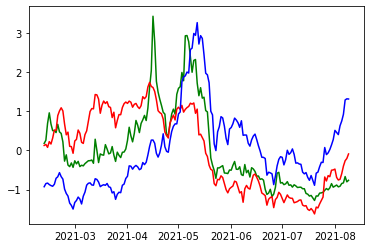

In [32]:
plt.plot(df_scaled.index, df_scaled['BSV'], color='green')
plt.plot(df_scaled.index, df_scaled['BTC'], color='red')
plt.plot(df_scaled.index, df_scaled['ETH'], color='blue')

In [33]:
split = int(int(lim)/2)

In [34]:
Ytrain = pd.DataFrame(df_scaled[:split]['BTC'])
Ytest = pd.DataFrame(df_scaled[split:]['BTC'])

In [36]:
X = df_scaled[['BTC_lag1','BSV_lag1', 'ETH_lag1','BCH_lag1','LTC_lag1','XRP_lag1','BNB_lag1','XLM_lag1','DOGE_lag1','SOL_lag1','LINK_lag1']]

In [37]:
from sklearn.linear_model import ElasticNet

In [38]:
en = ElasticNet(alpha=0.1, normalize=False)

In [39]:
en.fit(X[:split], Ytrain)

ElasticNet(alpha=0.1)

In [40]:
coef = list(en.coef_)
coef

[0.4239567755334856,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.058835139653542715,
 0.0,
 -0.0,
 0.0,
 0.0]

In [41]:
count = 0
for i in X.columns:
    print(i, ':', coef[count])
    count = count + 1

BTC_lag1 : 0.4239567755334856
BSV_lag1 : 0.0
ETH_lag1 : 0.0
BCH_lag1 : -0.0
LTC_lag1 : 0.0
XRP_lag1 : 0.0
BNB_lag1 : 0.058835139653542715
XLM_lag1 : 0.0
DOGE_lag1 : -0.0
SOL_lag1 : 0.0
LINK_lag1 : 0.0


In [42]:
import numpy as np

In [43]:
BTC_fitted = X.dot(coef)
BTC_fitted

time
2021-02-11   -0.104150
2021-02-12   -0.050108
2021-02-13   -0.038599
2021-02-14   -0.071727
2021-02-15   -0.009610
                ...   
2021-08-05   -0.328491
2021-08-06   -0.259678
2021-08-07   -0.175369
2021-08-08   -0.117856
2021-08-09   -0.093381
Freq: D, Length: 180, dtype: float64

In [44]:
BTC_actual = df_scaled[['BTC']]
BTC_actual

,BTC
time,
2021-02-11,0.125190
2021-02-12,0.151593
2021-02-13,0.076253
2021-02-14,0.222158
2021-02-15,0.161586
...,...
2021-08-05,-0.594518
2021-08-06,-0.400648
2021-08-07,-0.264964


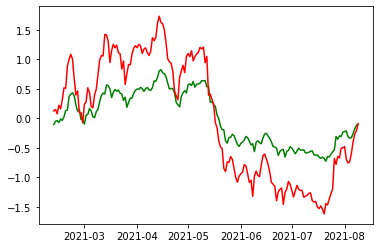

In [45]:
plt.plot(df_scaled.index, BTC_fitted, color='green')
plt.plot(df_scaled.index, BTC_actual , color='red')

In [46]:
y = BTC_actual
X = BTC_fitted

In [47]:
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [48]:
sample_size = len(df_scaled)

In [49]:
squared_residuals = np.square(X-y)

In [50]:
sum_squared_residuals = np.sum(squared_residuals)
sum_squared_residuals

58.654498013923856

In [51]:
MSE = sum_squared_residuals/sample_size
MSE

0.32585832229957695

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
X = df_scaled[['BTC_lag1']]

In [54]:
y = df_scaled['BTC']

In [55]:
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

[1.02838636e-15] [[0.98703691]]


In [58]:
forecast_BTC = lr.predict(X)

In [59]:
squared_residuals = np.square(forecast_BTC-y)

In [60]:
MSE = (np.sum(squared_residuals))/len(y)
MSE

0.025758128555255416